## Why is Twitter used for sentiment analysis ?

## How to perform sentiment analysis using python ?

### Requirements

In [1]:
import numpy as np
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from better_profanity import profanity

In [2]:
consumer_key = 'xxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxx'

In [3]:
auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)

In [4]:
api = tweepy.API(auth) #authenticating 

In [5]:
# asking the user for keywords of interest 
query = input("what are you interested in knowing about ? ")

what are you interested in knowing about ? kl rahul


In [6]:
 #filetering the query to remove retweets 
filtered_query = query + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets,q=filtered_query,lang="en").items(1000)
list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [7]:
# new data frame object which containes required information 
new_tweet_data = pd.DataFrame(data = list1,columns=['Tweet','User', "location"])

In [8]:
#converting only tweets data to a list for further processig 
tweet_list = new_tweet_data.Tweet.to_list()

In [9]:
#the below function cleans the tweets.It Removes profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    import re
    if type(tweet) == float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [10]:
cleaned = [clean_tweet(tweet) for tweet in tweet_list]

In [11]:
# Define the sentiment objects using TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

In [12]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

In [13]:
sentiment_values[0:10]

[[1.0,
  'sunil shetty after kl rahul throw get best place betting odds visit now'],
 [0.0, 'shaheen gave that kl rahul wicket credit shoaib malik'],
 [1.0, 'best decision kl rahul leave this franchise now mayank should leave'],
 [-0.25,
  'ppl even talked about dropping vk when out form its unbelievable kl was bit out'],
 [0.0,
  'kl rahul ran wet outfield at faster speed took soap hand threw it directly at'],
 [0.15,
  'do true commentry dont back players like kl rahul because you young indian talanted players dont get chances'],
 [-0.5,
  'you stop your fake comments kl rahul stop backing him one inning front lossing team like bangladesh'],
 [0.0,
  'kl rahul said discussion with virat kohli during practice was about how adapt conditions'],
 [-0.05,
  'tuesday virat kohli kl rahul were seen having long conversation nets wednesday rahul roared'],
 [0.0,
  'kl rahul was given out when ball was not hitting stump can anyone talk about this it seems l']]

In [14]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

In [15]:
sentiment_df.head(10)

,polarity,tweet
0,1.00,sunil shetty after kl rahul throw get best pla...
1,0.00,shaheen gave that kl rahul wicket credit shoai...
2,1.00,best decision kl rahul leave this franchise no...
3,-0.25,ppl even talked about dropping vk when out for...
4,0.00,kl rahul ran wet outfield at faster speed took...
5,0.15,do true commentry dont back players like kl ra...
6,-0.50,you stop your fake comments kl rahul stop back...
7,0.00,kl rahul said discussion with virat kohli duri...
8,-0.05,tuesday virat kohli kl rahul were seen having ...
9,0.00,kl rahul was given out when ball was not hitti...


In [16]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

In [17]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1

Positive
Neutral
Positive
Negative
Neutral
Positive
Negative
Neutral
Negative
Neutral
Positive
Positive
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Negative
Positive
Neutral
Positive
Positive
Positive
Positive
Neutral
Negative
Positive
Neutral
Positive
Positive
Negative
Neutral
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Positive
Positive
Negative
Neutral
Negative
Positive
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Negative
Positive
Positive
Neutral
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Neutral
Negative
Positive
Positive
Neutral
Negative
Neutral
Positive
Positive
Neutral
Posit

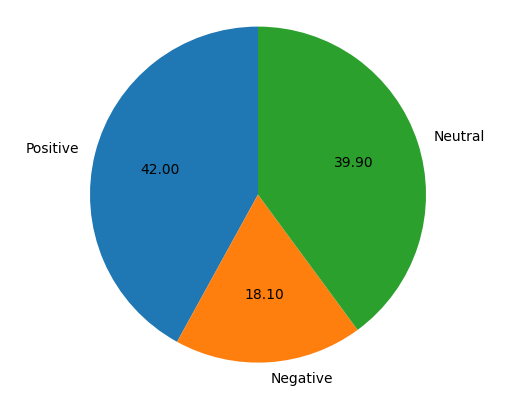

In [18]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu] #variables declared above 

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

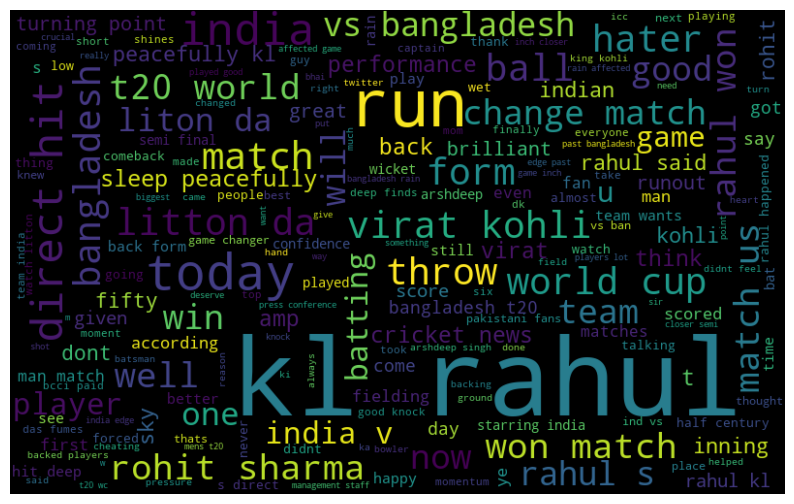

In [19]:
all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()